In [33]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


In [34]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [35]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [36]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [37]:
len(dataset)

68

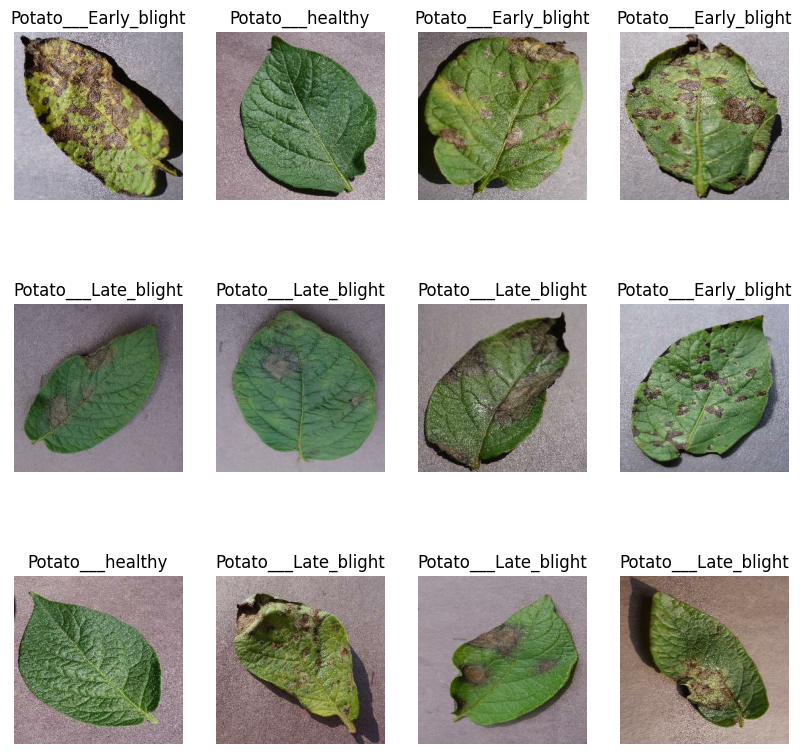

In [38]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")


In [78]:
80% ==> training
20% ==> 10% validation, 10% test

SyntaxError: invalid syntax (829920516.py, line 1)

In [40]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [41]:
train_ds = dataset.take(54)
len(train_ds)

54

In [45]:
test_ds = dataset.skip(54)
len(train_ds)

14

In [46]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [47]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [48]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [57]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split= 0.1, test_split= 0.1, shuffle = True ,shuffle_size=10000):
  
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
        
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

                        
    return train_ds, val_ds, test_ds

In [58]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [59]:
len(train_ds)

54

In [60]:
len(val_ds)

6

In [61]:
len(test_ds)

8

In [64]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [67]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [68]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    
])

In [72]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
n_classes=3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation = 'relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D (64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D (64, (3, 3), activation= 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D (64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [73]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_18 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPooli  (32, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (32, 62, 62, 64)          0         
 ng2D)                                                

In [75]:
model.compile(
    optimizer='adam',
    loss=tf.keras. losses. SparseCategoricalCrossentropy (from_logits=False),
    metrics=['accuracy']
)

In [79]:
history = model.fit(
    train_ds, 
    epochs = EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
 4/54 [=>............................] - ETA: 1:47 - loss: 0.0043 - accuracy: 1.0000

KeyboardInterrupt: 

In [122]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 4s 481ms/step - loss: 0.0660 - accuracy: 0.9688


In [125]:
scores

[0.06598030775785446, 0.96875]

In [126]:
history

In [83]:
history

In [127]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [129]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [109]:
history.history['accuracy']

[0.5005787014961243,
 0.6950231194496155,
 0.8211805820465088,
 0.8773148059844971,
 0.9288194179534912,
 0.9039351940155029,
 0.9322916865348816,
 0.9403935074806213,
 0.9461805820465088,
 0.9282407164573669,
 0.9375,
 0.9670138955116272,
 0.9415509104728699,
 0.9537037014961243,
 0.9722222089767456,
 0.9652777910232544,
 0.9646990895271301,
 0.9542824029922485,
 0.9652777910232544,
 0.9722222089767456,
 0.9762731194496155,
 0.9774305820465088,
 0.9855324029922485,
 0.984375,
 0.9756944179534912,
 0.9751157164573669,
 0.9797453880310059,
 0.9820601940155029,
 0.9890046119689941,
 0.9895833134651184,
 0.9890046119689941,
 0.9768518805503845,
 0.9826388955116272,
 0.9872685074806213,
 0.9797453880310059,
 0.9814814925193787,
 0.984375,
 0.9855324029922485,
 0.9837962985038757,
 0.9884259104728699,
 0.9739583134651184,
 0.9820601940155029,
 0.9942129850387573,
 0.9785879850387573,
 0.9832175970077515,
 0.9768518805503845,
 0.9895833134651184,
 0.9924768805503845,
 0.9890046119689941,
 0.

In [110]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

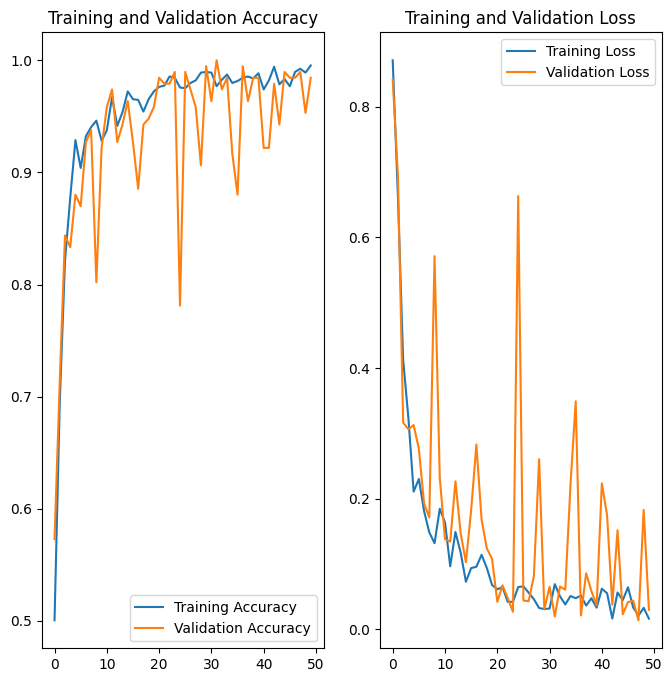

In [130]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [108]:
np.argmax([1.0000000e+00, 1.5065520e-09, 2.7503354e-22])

0

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 1s 511ms/step
predicted label: Potato___Early_blight


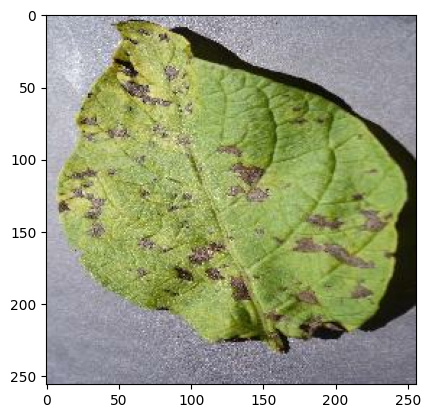

In [136]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    

In [137]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [138]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

1/1 [==============================] - 0s 40ms/step


In [142]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/4\assets


INFO:tensorflow:Assets written to: ../models/4\assets
